In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import requests
from sklearn.impute import SimpleImputer

## Part B: Data Acquisition

### CSV File

In [13]:
df = pd.read_csv("customer_credit_risk_dataset_700_rows.csv")
df

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,59.0,Other,North,Graduate,Salaried,778076.63,308847.63,Home,603.0,0,179,55.69,2023-06-27 07:33:00,0
1,CUST1001,49.0,Female,East,Graduate,Salaried,715041.00,367030.88,Home,672.0,10,48,10.72,2017-06-24 15:17:32,1
2,CUST1002,35.0,Female,West,Post-Graduate,Salaried,700133.14,248617.62,Other,656.0,1,148,30.62,2022-11-05 08:27:53,0
3,CUST1003,63.0,Female,North,Secondary,NaN,609954.74,325569.57,Other,NaN,5,45,42.55,2016-01-07 10:41:09,0
4,CUST1004,28.0,Female,North,Graduate,Unemployed,601412.63,155590.12,Business,671.0,5,61,46.81,2019-03-13 07:12:07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,CUST1695,48.0,Male,East,Graduate,Salaried,606888.20,-47421.58,Business,596.0,9,74,83.90,2023-09-22 21:06:53,0
696,CUST1696,37.0,Other,South,Graduate,Self-Employed,102334.53,428702.13,Business,690.0,11,77,28.38,2016-07-17 03:17:52,0
697,CUST1697,NaN,Male,North,Primary,Unemployed,468350.32,175770.56,Business,NaN,5,137,69.96,2023-11-09 18:15:09,0
698,CUST1698,51.0,Female,South,Secondary,Salaried,690701.74,-2773.18,Business,687.0,10,72,60.44,2023-02-17 02:30:07,0


### JSON File

In [14]:
json_open = pd.read_json("prc.json")
json_open

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,hoocro1,Hooded Crow,Corvus cornix,L7884500,"улица Старикова, Chundzha KZ-Almaty (43.5309,7...",2020-01-21 16:35,1,43.530936,79.455132,True,False,True,S63619695
1,bohwax,Bohemian Waxwing,Bombycilla garrulus,L7884500,"улица Старикова, Chundzha KZ-Almaty (43.5309,7...",2020-01-21 16:35,16,43.530936,79.455132,True,False,True,S63619695
2,eutspa,Eurasian Tree Sparrow,Passer montanus,L10233102,Ahmet Yesevi University,2020-01-21 09:03,1,43.299512,68.306523,True,False,False,S63615092
3,houspa,House Sparrow,Passer domesticus,L10233102,Ahmet Yesevi University,2020-01-21 09:03,2,43.299512,68.306523,True,False,False,S63615092
4,gretit1,Great Tit,Parus major,L9840246,Shybynsay,2020-01-21 09:00,16,43.198302,77.040023,True,False,True,S63617298
5,eurmag1,Eurasian Magpie,Pica pica,L9840246,Shybynsay,2020-01-21 09:00,4,43.198302,77.040023,True,False,True,S63617298
6,carcro1,Carrion Crow,Corvus corone,L9840246,Shybynsay,2020-01-21 09:00,3,43.198302,77.040023,True,False,True,S63617298
7,azutit2,Azure Tit,Cyanistes cyanus,L9840246,Shybynsay,2020-01-21 09:00,4,43.198302,77.040023,True,False,True,S63617298
8,eurbla,Eurasian Blackbird,Turdus merula,L9840246,Shybynsay,2020-01-21 09:00,2,43.198302,77.040023,True,False,True,S63617298
9,eurgol,European Goldfinch,Carduelis carduelis,L9840246,Shybynsay,2020-01-21 09:00,20,43.198302,77.040023,True,False,True,S63617298


### SQL Database

In [15]:
conn = sqlite3.connect("collegedb")
csv = pd.read_csv("D:\AI&ML\sql\smartphones_cleaned_v6.csv")
csv.to_sql("smartphones_cleanned_v6",conn, if_exists ="replace", index = False)
sql_df = pd.read_sql("SELECT * FROM smartphones_cleanned_v6", conn)
sql_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,1,1,0,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,1,0,0,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,1,0,0,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,1,0,0,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


### API Data


In [16]:

url = "https://api.data.gov.in/resource/9a362ec2-2cfc-4e08-8c74-7926b2159a69?api-key=579b464db66ec23bdd0000016ed11d232c0b4c814d6cd6d9924a230a&format=json"
response = requests.get(url)
Api_data = response.json()
print(Api_data)

{'index_name': '9a362ec2-2cfc-4e08-8c74-7926b2159a69', 'title': 'State/UT-wise HIV Prevalence in different population groups based on HIV Sentinel Surveillance up to 2010-11', 'desc': 'State/UT-wise HIV Prevalence in different population groups based on HIV Sentinel Surveillance up to 2010-11', 'created': 1741693095562, 'updated': 1741694347, 'created_date': '2025-03-11T17:08:28Z', 'updated_date': '2025-03-11T17:29:07Z', 'active': '1', 'visualizable': '1', 'domain': 4, 'catalog_uuid': 'c13864fa-99d2-4b4a-a240-c5bc2b8e07ba', 'source': 'www.data.gov.in', 'org_type': 'Central', 'org': ['Ministry of Health and Family Welfare', 'Department of AIDS Control'], 'sector': ['Health and Family welfare', 'Health'], 'field': [{'id': 'states_uts', 'name': 'States/UTs', 'type': 'keyword'}, {'id': 'smm_2005', 'name': 'SMM_2005', 'type': 'double'}, {'id': 'smm_2006', 'name': 'SMM_2006', 'type': 'double'}, {'id': 'smm_2007', 'name': 'SMM_2007', 'type': 'double'}, {'id': 'smm_2009', 'name': 'SMM_2009', '

## Part C: Data Understanding & Cleaning

In [17]:
df.head()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,59.0,Other,North,Graduate,Salaried,778076.63,308847.63,Home,603.0,0,179,55.69,2023-06-27 07:33:00,0
1,CUST1001,49.0,Female,East,Graduate,Salaried,715041.00,367030.88,Home,672.0,10,48,10.72,2017-06-24 15:17:32,1
2,CUST1002,35.0,Female,West,Post-Graduate,Salaried,700133.14,248617.62,Other,656.0,1,148,30.62,2022-11-05 08:27:53,0
3,CUST1003,63.0,Female,North,Secondary,NaN,609954.74,325569.57,Other,NaN,5,45,42.55,2016-01-07 10:41:09,0
4,CUST1004,28.0,Female,North,Graduate,Unemployed,601412.63,155590.12,Business,671.0,5,61,46.81,2019-03-13 07:12:07,1


In [18]:
df.tail()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
695,CUST1695,48.0,Male,East,Graduate,Salaried,606888.20,-47421.58,Business,596.0,9,74,83.90,2023-09-22 21:06:53,0
696,CUST1696,37.0,Other,South,Graduate,Self-Employed,102334.53,428702.13,Business,690.0,11,77,28.38,2016-07-17 03:17:52,0
697,CUST1697,NaN,Male,North,Primary,Unemployed,468350.32,175770.56,Business,NaN,5,137,69.96,2023-11-09 18:15:09,0
698,CUST1698,51.0,Female,South,Secondary,Salaried,690701.74,-2773.18,Business,687.0,10,72,60.44,2023-02-17 02:30:07,0
699,CUST1699,25.0,Male,North,Secondary,Salaried,403541.19,321759.56,Education,654.0,11,122,69.97,2019-11-08 23:54:55,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        700 non-null    object 
 1   age                665 non-null    float64
 2   gender             700 non-null    object 
 3   region             700 non-null    object 
 4   education_level    700 non-null    object 
 5   employment_type    665 non-null    object 
 6   annual_income      665 non-null    float64
 7   loan_amount        700 non-null    float64
 8   loan_purpose       700 non-null    object 
 9   credit_score       665 non-null    float64
 10  repayment_history  700 non-null    int64  
 11  transaction_count  700 non-null    int64  
 12  spending_ratio     700 non-null    float64
 13  join_date          700 non-null    object 
 14  default_flag       700 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 82.2+ KB


In [20]:
df.describe()

,age,annual_income,loan_amount,credit_score,repayment_history,transaction_count,spending_ratio,default_flag
count,665.000000,6.650000e+02,7.000000e+02,665.000000,700.000000,700.000000,700.000000,700.000000
mean,42.912782,6.191364e+05,3.101379e+05,676.936842,5.680000,102.984286,51.312500,0.195714
std,12.513303,2.653466e+05,1.642380e+05,49.646299,3.476946,53.835930,23.370036,0.397033
min,21.000000,1.772810e+03,-1.394173e+05,521.000000,0.000000,10.000000,10.410000,0.000000
25%,32.000000,4.725385e+05,1.929871e+05,646.000000,3.000000,57.000000,31.515000,0.000000
50%,44.000000,5.952896e+05,3.109553e+05,679.000000,6.000000,100.500000,52.350000,0.000000
75%,53.000000,7.366658e+05,4.149004e+05,713.000000,9.000000,150.000000,71.732500,0.000000
max,64.000000,2.743812e+06,1.088750e+06,818.000000,11.000000,199.000000,89.860000,1.000000


In [21]:
df.isnull().sum()

customer_id           0
age                  35
gender                0
region                0
education_level       0
employment_type      35
annual_income        35
loan_amount           0
loan_purpose          0
credit_score         35
repayment_history     0
transaction_count     0
spending_ratio        0
join_date             0
default_flag          0
dtype: int64

In [22]:
df.shape

(700, 15)

In [23]:
df.isnull().sum()/len(df) * 100

customer_id          0.0
age                  5.0
gender               0.0
region               0.0
education_level      0.0
employment_type      5.0
annual_income        5.0
loan_amount          0.0
loan_purpose         0.0
credit_score         5.0
repayment_history    0.0
transaction_count    0.0
spending_ratio       0.0
join_date            0.0
default_flag         0.0
dtype: float64

In [24]:
from ydata_profiling import ProfileReport

df_csv = pd.read_csv(r"D:\AI&ML\Data Visulazation\Rnw_Main folder\Main_Data\FinalProject1\customer_credit_risk_dataset_700_rows.csv")
profile = ProfileReport(df_csv, title="Customer Credit Bank Data Analysis Report")
profile
profile.to_file("Customer Credit Bank data analysis Report.html")

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 70.24it/s]


### Simple Imputer For Numeric Column Age

In [25]:
# Using Mean in SimpleImputer
imp = SimpleImputer(strategy="mean")
df["age"] = imp.fit_transform(df[["age"]])
df["age"]

0      59.000000
1      49.000000
2      35.000000
3      63.000000
4      28.000000
         ...    
695    48.000000
696    37.000000
697    42.912782
698    51.000000
699    25.000000
Name: age, Length: 700, dtype: float64

In [26]:
df.isnull().sum()

customer_id           0
age                   0
gender                0
region                0
education_level       0
employment_type      35
annual_income        35
loan_amount           0
loan_purpose          0
credit_score         35
repayment_history     0
transaction_count     0
spending_ratio        0
join_date             0
default_flag          0
dtype: int64

### Simple Imputer For Categorical Column Gender

In [27]:
# Most_frequent For Gender Column
imp_ge = SimpleImputer(strategy="most_frequent")
df[["gender"]] = imp_ge.fit_transform(df[["gender"]])
df["gender"]

0       Other
1      Female
2      Female
3      Female
4      Female
        ...  
695      Male
696     Other
697      Male
698    Female
699      Male
Name: gender, Length: 700, dtype: object

In [28]:
df.isnull().sum()

customer_id           0
age                   0
gender                0
region                0
education_level       0
employment_type      35
annual_income        35
loan_amount           0
loan_purpose          0
credit_score         35
repayment_history     0
transaction_count     0
spending_ratio        0
join_date             0
default_flag          0
dtype: int64

### Simple Imputer For Categorical Column Employment_type

In [29]:
# Most_frequent For Emploment_Type Column
imp_et = SimpleImputer(strategy="most_frequent")
df[["employment_type"]] = imp_et.fit_transform(df[["employment_type"]])
df["employment_type"]

0           Salaried
1           Salaried
2           Salaried
3           Salaried
4         Unemployed
           ...      
695         Salaried
696    Self-Employed
697       Unemployed
698         Salaried
699         Salaried
Name: employment_type, Length: 700, dtype: object

In [30]:
df.isnull().sum()

customer_id           0
age                   0
gender                0
region                0
education_level       0
employment_type       0
annual_income        35
loan_amount           0
loan_purpose          0
credit_score         35
repayment_history     0
transaction_count     0
spending_ratio        0
join_date             0
default_flag          0
dtype: int64

### KNN Method for the Annual Income, Loan Amount, and Credit Score Columns

In [31]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=5)
cols = ["annual_income", "loan_amount", "credit_score"]
df[cols] = knn_imp.fit_transform(df[cols])

In [32]:
df

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,59.000000,Other,North,Graduate,Salaried,778076.63,308847.63,Home,603.0,0,179,55.69,2023-06-27 07:33:00,0
1,CUST1001,49.000000,Female,East,Graduate,Salaried,715041.00,367030.88,Home,672.0,10,48,10.72,2017-06-24 15:17:32,1
2,CUST1002,35.000000,Female,West,Post-Graduate,Salaried,700133.14,248617.62,Other,656.0,1,148,30.62,2022-11-05 08:27:53,0
3,CUST1003,63.000000,Female,North,Secondary,Salaried,609954.74,325569.57,Other,680.0,5,45,42.55,2016-01-07 10:41:09,0
4,CUST1004,28.000000,Female,North,Graduate,Unemployed,601412.63,155590.12,Business,671.0,5,61,46.81,2019-03-13 07:12:07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,CUST1695,48.000000,Male,East,Graduate,Salaried,606888.20,-47421.58,Business,596.0,9,74,83.90,2023-09-22 21:06:53,0
696,CUST1696,37.000000,Other,South,Graduate,Self-Employed,102334.53,428702.13,Business,690.0,11,77,28.38,2016-07-17 03:17:52,0
697,CUST1697,42.912782,Male,North,Primary,Unemployed,468350.32,175770.56,Business,718.0,5,137,69.96,2023-11-09 18:15:09,0
698,CUST1698,51.000000,Female,South,Secondary,Salaried,690701.74,-2773.18,Business,687.0,10,72,60.44,2023-02-17 02:30:07,0


In [33]:
df.isnull().sum()

customer_id          0
age                  0
gender               0
region               0
education_level      0
employment_type      0
annual_income        0
loan_amount          0
loan_purpose         0
credit_score         0
repayment_history    0
transaction_count    0
spending_ratio       0
join_date            0
default_flag         0
dtype: int64

### MICE Method

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imp = IterativeImputer(random_state=42)
cols = ["annual_income", "loan_amount", "credit_score"]
df[cols] = mice_imp.fit_transform(df[cols])


### Complete Case Analysis (Drop Missing)

In [35]:
df.dropna()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,59.000000,Other,North,Graduate,Salaried,778076.63,308847.63,Home,603.0,0,179,55.69,2023-06-27 07:33:00,0
1,CUST1001,49.000000,Female,East,Graduate,Salaried,715041.00,367030.88,Home,672.0,10,48,10.72,2017-06-24 15:17:32,1
2,CUST1002,35.000000,Female,West,Post-Graduate,Salaried,700133.14,248617.62,Other,656.0,1,148,30.62,2022-11-05 08:27:53,0
3,CUST1003,63.000000,Female,North,Secondary,Salaried,609954.74,325569.57,Other,680.0,5,45,42.55,2016-01-07 10:41:09,0
4,CUST1004,28.000000,Female,North,Graduate,Unemployed,601412.63,155590.12,Business,671.0,5,61,46.81,2019-03-13 07:12:07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,CUST1695,48.000000,Male,East,Graduate,Salaried,606888.20,-47421.58,Business,596.0,9,74,83.90,2023-09-22 21:06:53,0
696,CUST1696,37.000000,Other,South,Graduate,Self-Employed,102334.53,428702.13,Business,690.0,11,77,28.38,2016-07-17 03:17:52,0
697,CUST1697,42.912782,Male,North,Primary,Unemployed,468350.32,175770.56,Business,718.0,5,137,69.96,2023-11-09 18:15:09,0
698,CUST1698,51.000000,Female,South,Secondary,Salaried,690701.74,-2773.18,Business,687.0,10,72,60.44,2023-02-17 02:30:07,0


## Part D: Outlier Handling

In [36]:
df.select_dtypes(include="number")

,age,annual_income,loan_amount,credit_score,repayment_history,transaction_count,spending_ratio,default_flag
0,59.000000,778076.63,308847.63,603.0,0,179,55.69,0
1,49.000000,715041.00,367030.88,672.0,10,48,10.72,1
2,35.000000,700133.14,248617.62,656.0,1,148,30.62,0
3,63.000000,609954.74,325569.57,680.0,5,45,42.55,0
4,28.000000,601412.63,155590.12,671.0,5,61,46.81,1
...,...,...,...,...,...,...,...,...
695,48.000000,606888.20,-47421.58,596.0,9,74,83.90,0
696,37.000000,102334.53,428702.13,690.0,11,77,28.38,0
697,42.912782,468350.32,175770.56,718.0,5,137,69.96,0
698,51.000000,690701.74,-2773.18,687.0,10,72,60.44,0


In [37]:
%matplotlib inline


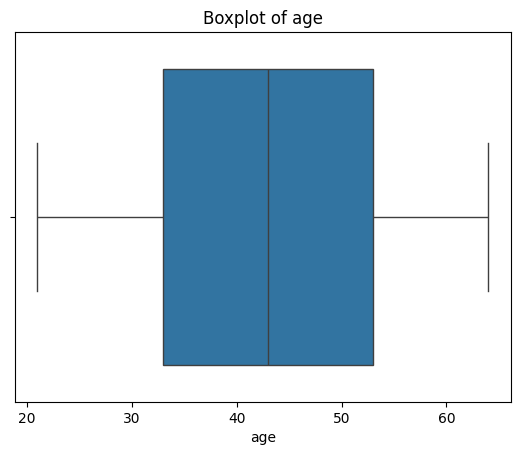

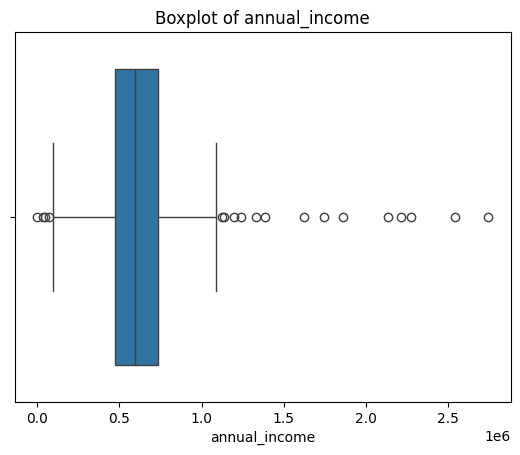

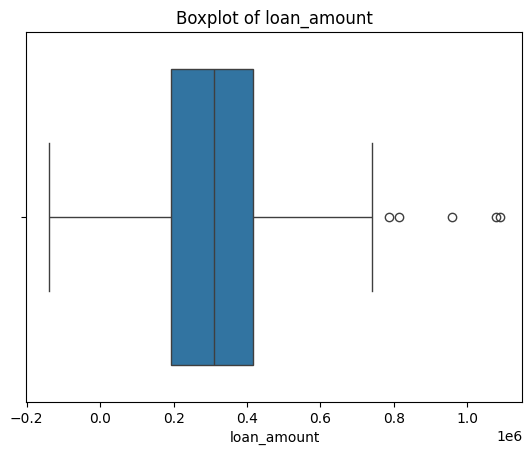

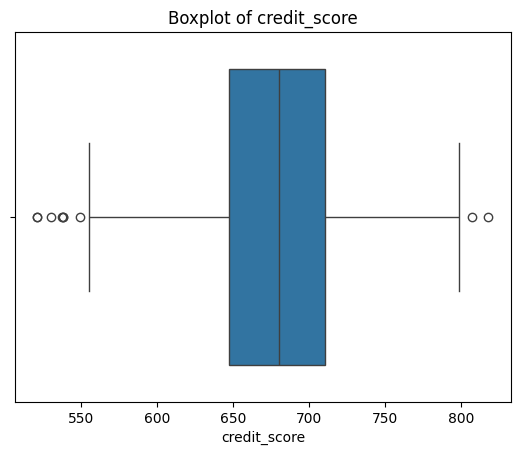

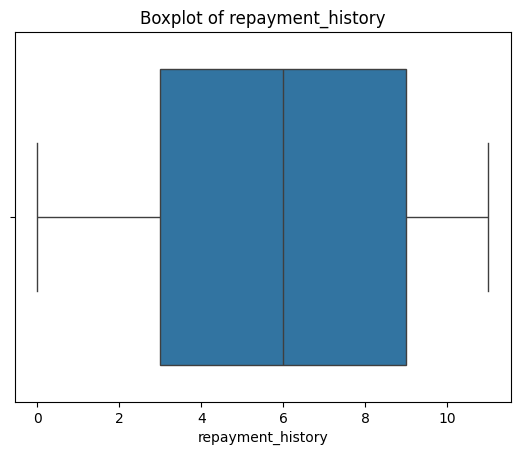

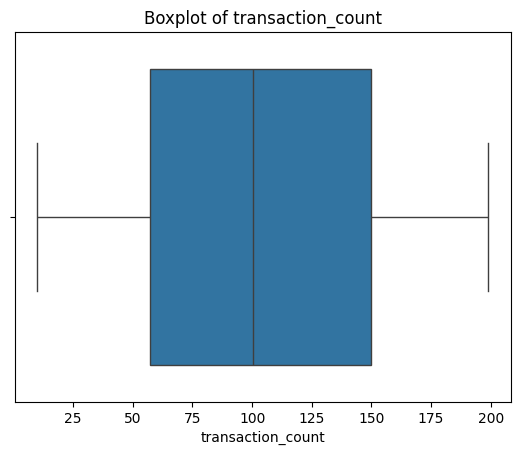

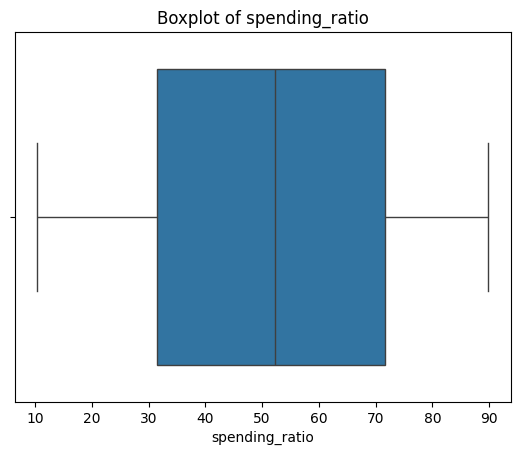

In [38]:
Col = ["age","annual_income","loan_amount","credit_score","repayment_history","transaction_count","spending_ratio"]
for col in Col:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Outlier Present in the Annual Income, Load amount and Credit Score column.

### Z - Score Method For Annual Income

In [39]:
import scipy.stats as stats
z_scores = np.abs(stats.zscore(df["annual_income"]))
df_z = df[(z_scores < 3)]


In [40]:
df_z.shape

(692, 15)

Text(0.5, 1.0, 'After')

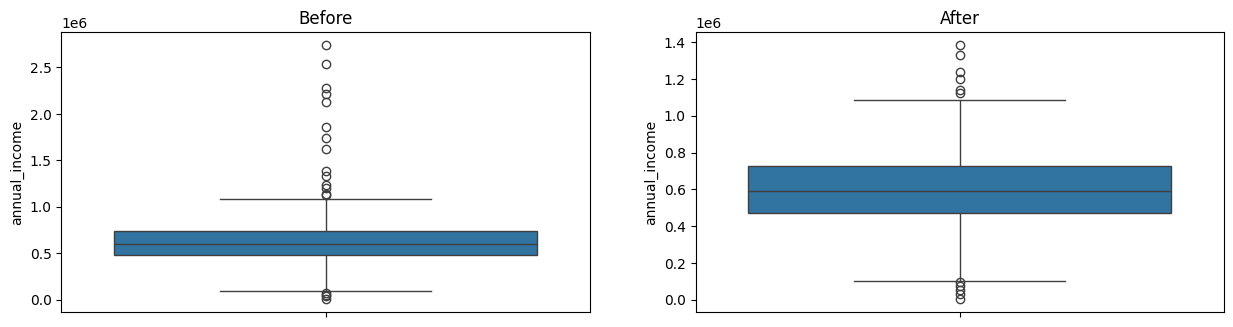

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df["annual_income"])
plt.title("Before")

plt.subplot(2,2,2)
sns.boxplot(df_z["annual_income"])
plt.title("After")